### Polynomial Regression

A model that has a higher order term for the independent variable. If we see a plot that has a non-linear relationship between x and y this can be expressed by interaction variables.



In [ ]:
# Import

Home Size	KW Hrs/Mnth
1290	1182
1350	1172
1470	1264
1600	1493
1710	1571
1840	1711
1980	1804
2230	1840
2400	1956
2930	1954

In [27]:
home_size = np.array([1290,1350,1470,1600,1710,1840,1980,2230,2400,2930])
kw_hours_month = np.array([1182, 1172, 1264, 1493, 1571, 1711, 1804, 1840, 1956, 1954])


data from https://www.statsdirect.com/help/regression_and_correlation/polynomial.htm

resource on calculating in python : http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab12/Lab%2012%20-%20Polynomial%20Regression%20and%20Step%20Functions%20in%20Python.pdf


quality resource on polynomial regressions in general: http://home.iitk.ac.in/~shalab/regression/Chapter12-Regression-PolynomialRegression.pdf

Text(0,0.5,'KW hours/month')

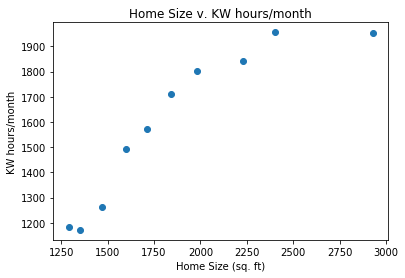

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(home_size,kw_hours_month)
plt.title('Home Size v. KW hours/month')
plt.xlabel('Home Size (sq. ft)')
plt.ylabel('KW hours/month')

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(home_size.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(home_size.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(home_size.reshape(-1,1))
# predict_ = poly.fit_transform([kw_hours_month])

In [50]:
lr = LinearRegression()
lr3 = LinearRegression()
lr4 = LinearRegression()
lr.fit(X2, kw_hours_month)
lr3.fit(X3, kw_hours_month)
lr4.fit(X4, kw_hours_month)


[1129.56411412 1202.21355416 1337.79156553 1470.04143741 1570.0641134
 1674.23147566 1769.40019168 1895.46540615 1949.05688041 1949.17126148]


In [53]:
lr.coef_

array([ 0.00000000e+00,  2.39893018e+00, -4.50040218e-04])

Text(0,0.5,'KW hours/month')

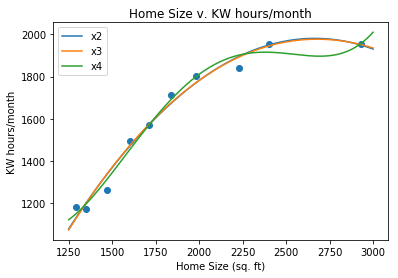

In [51]:
import numpy as np
# np.polyfit()
x_values = np.linspace(1250,3000,num=1000)

x2 = poly.fit_transform(x_values.reshape(-1,1))
x3 = PolynomialFeatures(3).fit_transform(x_values.reshape(-1,1))
x4 = PolynomialFeatures(4).fit_transform(x_values.reshape(-1,1))
plt.scatter(home_size,kw_hours_month)
plt.plot(x_values,lr.predict(x2),label='x2')

plt.plot(x_values, lr3.predict(x3),label= 'x3')
plt.plot(x_values,lr4.predict(x4),label='x4')
plt.title('Home Size v. KW hours/month')
plt.legend()
plt.xlabel('Home Size (sq. ft)')
plt.ylabel('KW hours/month')

#### We can take a look at the residuals of the graph to determine our line is a good fit

more on graphing residuals: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

<img src = "./resources/residuals.gif">

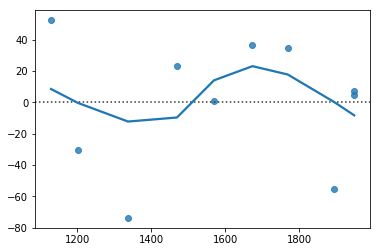

In [56]:
import seaborn as sns
sns.residplot(lr.predict(X2),kw_hours_month,lowess = True)

#### What conclusions could be drawn from our data. Would the conclusions be correct?

In [26]:
np.polyfit(home_size,kw_hours_month,2)

array([-4.50040218e-04,  2.39893018e+00, -1.21614389e+03])

In [ ]:
x_values = np.linspace(1250,3000,num=1000)
np.poly1d()

How to determine the optimal amount for the polynomial?

* Use cross-validation to determine which model performs best on the validation set. If you keep increasing the degree of polynomial, you will eventually reach a line that fits the data perfectly (with zero error). This will of course be overfitting.

* Think about your domain of interest. Does it make sense to represent a relationship with polynomials?

* Use caution when extrapolating information about the regions of the graph that do not contain any x-values